# Qwen2.5-VL „ÅäË©¶„ÅóÊé®Ë´ñ„Éá„É¢

„Åì„ÅÆnotebook„Åß„ÅØ„ÄÅQwen2.5-VL„É¢„Éá„É´„Çí‰ΩøÁî®„Åó„ÅüÁîªÂÉèÁêÜËß£„ÇÑÊé®Ë´ñ„ÅÆ„Éá„É¢„ÇíÂÆüË°å„Åß„Åç„Åæ„Åô„ÄÇ

## ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´

„Åæ„Åö„ÅØÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´„Åó„Åæ„ÅôÔºö

```bash
pip install transformers==4.51.3 accelerate
pip install qwen-vl-utils[decord]
pip install torch torchvision
pip install pillow requests
```

## „É¢„Éá„É´„Å´„Å§„ÅÑ„Å¶

Qwen2.5-VL„ÅØ„ÄÅAlibaba CloudÈñãÁô∫„ÅÆÊúÄÊñ∞„ÅÆ„Éì„Ç∏„Éß„É≥Ë®ÄË™û„É¢„Éá„É´„Åß„Åô„ÄÇ‰ª•‰∏ã„ÅÆÁâπÂæ¥„Åå„ÅÇ„Çä„Åæ„ÅôÔºö

- **„Éû„É´„ÉÅ„É¢„Éº„ÉÄ„É´ÁêÜËß£**: ÁîªÂÉè„ÄÅÂãïÁîª„ÄÅ„ÉÜ„Ç≠„Çπ„Éà„ÇíÁµ±ÂêàÁöÑ„Å´ÁêÜËß£
- **ÂãïÁöÑËß£ÂÉèÂ∫¶**: Êßò„ÄÖ„Å™Ëß£ÂÉèÂ∫¶„ÅÆÁîªÂÉè„Å´ÂØæÂøú
- **Flash Attention**: È´òÂäπÁéá„Å™Êé®Ë´ñ„Çí„Çµ„Éù„Éº„Éà
- **Ë§áÊï∞„Çµ„Ç§„Ç∫**: 3B„ÄÅ7B„ÄÅ32B„ÄÅ72B„Éë„É©„É°„Éº„Çø„ÅÆ„É¢„Éá„É´„ÅåÂà©Áî®ÂèØËÉΩ

In [1]:
# „É¢„Éá„É´„ÅÆÂàùÊúüÂåñ„Å®„Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó
import torch
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# GPU„ÅÆÂà©Áî®ÂèØËÉΩÊÄß„ÇíÁ¢∫Ë™ç
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"‰ΩøÁî®„Éá„Éê„Ç§„Çπ: {device}")

# „É¢„Éá„É´Âêç„ÇíË®≠ÂÆöÔºàGPU „É°„É¢„É™„Å´Âøú„Åò„Å¶Â§âÊõ¥ÂèØËÉΩÔºâ
model_name = "Qwen/Qwen2.5-VL-3B-Instruct"  # ËªΩÈáèÁâà
# model_name = "Qwen/Qwen2.5-VL-7B-Instruct"  # Ê®ôÊ∫ñÁâàÔºà„Çà„ÇäÈ´òÁ≤æÂ∫¶Ôºâ

print(f"„É¢„Éá„É´ {model_name} „ÇíË™≠„ÅøËæº„Åø‰∏≠...")

# „É¢„Éá„É´„Å®„Éó„É≠„Çª„ÉÉ„Çµ„Éº„ÇíÂàùÊúüÂåñ
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_name, 
    torch_dtype="auto", 
    device_map="auto"
)

# „Éó„É≠„Çª„ÉÉ„Çµ„Éº„ÅÆÂàùÊúüÂåñÔºàÁîªÂÉèËß£ÂÉèÂ∫¶„ÅÆË®≠ÂÆöÔºâ
min_pixels = 256 * 28 * 28
max_pixels = 1280 * 28 * 28
processor = AutoProcessor.from_pretrained(
    model_name, 
    min_pixels=min_pixels, 
    max_pixels=max_pixels
)

print("„É¢„Éá„É´„ÅÆÂàùÊúüÂåñÂÆå‰∫ÜÔºÅ")

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


‰ΩøÁî®„Éá„Éê„Ç§„Çπ: cuda
„É¢„Éá„É´ Qwen/Qwen2.5-VL-3B-Instruct „ÇíË™≠„ÅøËæº„Åø‰∏≠...


Loading checkpoint shards: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:09<00:00,  4.63s/it]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


„É¢„Éá„É´„ÅÆÂàùÊúüÂåñÂÆå‰∫ÜÔºÅ


In [2]:
# ÁîªÂÉèÊé®Ë´ñ„ÅÆ„Éò„É´„Éë„ÉºÈñ¢Êï∞
def run_image_inference(image_url, text_prompt):
    """
    ÁîªÂÉèURL„Åæ„Åü„ÅØ„É≠„Éº„Ç´„É´„Éë„Çπ„Å®Ë≥™Âïè„ÉÜ„Ç≠„Çπ„Éà„Çí‰Ωø„Å£„Å¶Êé®Ë´ñ„ÇíÂÆüË°å
    """
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image_url},
                {"type": "text", "text": text_prompt},
            ],
        }
    ]
    
    # „ÉÅ„É£„ÉÉ„Éà„ÉÜ„É≥„Éó„É¨„Éº„Éà„ÇíÈÅ©Áî®
    text = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    
    # ÁîªÂÉè„Å®ÂãïÁîª„ÅÆÊÉÖÂ†±„ÇíÂá¶ÁêÜ
    image_inputs, video_inputs = process_vision_info(messages)
    
    # „Éó„É≠„Çª„ÉÉ„Çµ„Éº„Åß„ÉÜ„Ç≠„Çπ„Éà„Å®ÁîªÂÉè„ÇíÂá¶ÁêÜ
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to(model.device)
    
    # Êé®Ë´ñÂÆüË°å
    generated_ids = model.generate(**inputs, max_new_tokens=256, do_sample=False)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    
    return output_text[0]

print("ÁîªÂÉèÊé®Ë´ñÈñ¢Êï∞„ÅÆÊ∫ñÂÇôÂÆå‰∫ÜÔºÅ")

ÁîªÂÉèÊé®Ë´ñÈñ¢Êï∞„ÅÆÊ∫ñÂÇôÂÆå‰∫ÜÔºÅ


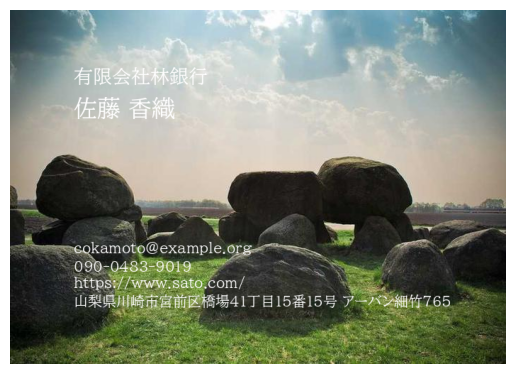

üì∏ ÁîªÂÉèËß£Êûê„Éá„É¢1: ÁîªÂÉè„ÅÆË©≥Á¥∞Ë™¨Êòé


/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1e-06` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Ë≥™Âïè: „Åì„ÅÆÁîªÂÉè„ÇíË©≥„Åó„ÅèË™¨Êòé„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
ÂõûÁ≠î: „Åì„ÅÆÁîªÂÉè„ÅØ„ÄÅÂ∫ÉÂ§ß„Å™ËçâÂéü„Å´Â∑®Â§ß„Å™Áü≥„ÅÆÂàó„Åå‰∏¶„Çì„Åß„ÅÑ„ÇãÈ¢®ÊôØÂÜôÁúü„Åß„Åô„ÄÇËÉåÊôØ„Å´„ÅØÊô¥„Çå„ÅüÁ©∫„Å®Èõ≤„Åå„ÅÇ„Çä„ÄÅÂ§™ÈôΩÂÖâ„ÅåÂú∞Èù¢„Å´ÂΩì„Åü„Å£„Å¶„ÅÑ„ÇãÊßòÂ≠ê„ÅåË¶ãÂèó„Åë„Çâ„Çå„Åæ„Åô„ÄÇÁü≥„ÅØÂ§ß„Åç„Å™ÂÜÜÂΩ¢„Åß„ÄÅ„Åù„ÅÆ‰∏äÈÉ®„Å´„ÅØÂ∞è„Åï„Å™Áü≥„ÅåÁ©ç„ÅøÈáç„Å≠„Çâ„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

ÁîªÂÉè„ÅÆ‰∏ãÈÉ®„Å´„ÅØ„ÄÅÊó•Êú¨Ë™û„Åß„ÄåÊúâÈôê‰ºöÁ§æÊûóÈäÄË°å ‰ΩêËó§ È¶ôÁπî„Äç„Å®„ÅÑ„ÅÜÂêçÂâç„ÅåË®òËºâ„Åï„Çå„Å¶„Åä„Çä„ÄÅ„Åì„Çå„ÅØ„Åä„Åù„Çâ„Åè‰∫∫Áâ©„ÅÆÂêçÂâç„ÇÑÈñ¢ÈÄ£„Åô„ÇãÁµÑÁπî„ÅÆÂêçÂâç„ÇíÁ§∫„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åæ„Åü„ÄÅ„É°„Éº„É´„Ç¢„Éâ„É¨„Çπ„Äåcokamoto@example.org„Äç„ÄÅÈõªË©±Áï™Âè∑„Äå090-0483-9019„Äç„ÄÅ„Ç¶„Çß„Éñ„Çµ„Ç§„Éà„Äåhttps://www.sato.com/„Äç„ÅåË®òËºâ„Åï„Çå„Å¶„Åä„Çä„ÄÅ„Åì„Çå„Çâ„ÅØÂÄã‰∫∫„Åæ„Åü„ÅØÁµÑÁπî„ÅÆÈÄ£Áµ°ÂÖàÊÉÖÂ†±„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

„Åï„Çâ„Å´„ÄÅ‰ΩèÊâÄ„ÄåÂ±±Ê¢®ÁúåÂ∑ùÂ¥éÂ∏ÇÂÆÆÂâçÂå∫Ê©ãÂ†¥41‰∏ÅÁõÆ15Áï™15Âè∑ „Ç¢„Éº„Éê„É≥Á¥∞Á´π765„Äç„ÇÇË®òËºâ„Åï„Çå„Å¶„Åä„Çä„ÄÅ„Åì„Çå„ÅØÂÖ∑‰ΩìÁöÑ„Å™Â†¥ÊâÄ„ÇíÁ§∫„Åó„Å¶„ÅÑ„

In [3]:
%%time
# „Éá„É¢1: „Ç§„É≥„Çø„Éº„Éç„ÉÉ„ÉàÁîªÂÉè„ÅÆËß£Êûê
# „Çµ„É≥„Éó„É´ÁîªÂÉèURLÔºàQwenÂÖ¨Âºè„ÅÆ„Éá„É¢ÁîªÂÉèÔºâ
sample_image_url = "/workspace/input/generate_image/test/image/2.png"

sample_img = Image.open(sample_image_url)
plt.imshow(sample_img)
plt.axis('off')  # Ëª∏„ÇíÈùûË°®Á§∫„Å´„Åô„Çã
plt.show()

# ÁîªÂÉè„ÅÆË©≥Á¥∞Ë™¨Êòé„ÇíÊ±Ç„ÇÅ„Çã
print("üì∏ ÁîªÂÉèËß£Êûê„Éá„É¢1: ÁîªÂÉè„ÅÆË©≥Á¥∞Ë™¨Êòé")
print("=" * 50)
prompt1 = "„Åì„ÅÆÁîªÂÉè„ÇíË©≥„Åó„ÅèË™¨Êòé„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ"
result1 = run_image_inference(sample_image_url, prompt1)
print(f"Ë≥™Âïè: {prompt1}")
print(f"ÂõûÁ≠î: {result1}")
print()

# ÁîªÂÉèÂÜÖ„ÅÆÁâπÂÆöË¶ÅÁ¥†„Å´„Å§„ÅÑ„Å¶Ë≥™Âïè
print("üì∏ ÁîªÂÉèËß£Êûê„Éá„É¢2: ÁâπÂÆöË¶ÅÁ¥†„Å´„Å§„ÅÑ„Å¶„ÅÆË≥™Âïè")
print("=" * 50)
prompt2 = "„Åì„ÅÆÁîªÂÉè„Å´ÂÜô„Å£„Å¶„ÅÑ„ÇãÂãïÁâ©„ÅØ‰Ωï„Åß„Åô„ÅãÔºü‰Ωï„Çí„Åó„Å¶„ÅÑ„Åæ„Åô„ÅãÔºü"
result2 = run_image_inference(sample_image_url, prompt2)
print(f"Ë≥™Âïè: {prompt2}")
print(f"ÂõûÁ≠î: {result2}")
print()

# ÁîªÂÉè„ÅÆËâ≤„ÇÑÈõ∞Âõ≤Ê∞ó„Å´„Å§„ÅÑ„Å¶
print("üì∏ ÁîªÂÉèËß£Êûê„Éá„É¢3: Ëâ≤„ÇÑÈõ∞Âõ≤Ê∞ó„ÅÆÂàÜÊûê")
print("=" * 50)
prompt3 = "„Åì„ÅÆÂÜôÁúü„ÅÆËâ≤Ë™ø„ÇÑÈõ∞Âõ≤Ê∞ó„Å´„Å§„ÅÑ„Å¶Êïô„Åà„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ"
result3 = run_image_inference(sample_image_url, prompt3)
print(f"Ë≥™Âïè: {prompt3}")
print(f"ÂõûÁ≠î: {result3}")

In [4]:
sample_image_url = "/workspace/input/generate_image/test/image/2.png"
prompt1 = "please describe image.<image>"

"""
ÁîªÂÉèURL„Åæ„Åü„ÅØ„É≠„Éº„Ç´„É´„Éë„Çπ„Å®Ë≥™Âïè„ÉÜ„Ç≠„Çπ„Éà„Çí‰Ωø„Å£„Å¶Êé®Ë´ñ„ÇíÂÆüË°å
"""
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": sample_image_url},
            {"type": "text", "text": prompt1},
        ],
    }
]

# „ÉÅ„É£„ÉÉ„Éà„ÉÜ„É≥„Éó„É¨„Éº„Éà„ÇíÈÅ©Áî®
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# ÁîªÂÉè„Å®ÂãïÁîª„ÅÆÊÉÖÂ†±„ÇíÂá¶ÁêÜ
image_inputs, video_inputs = process_vision_info(messages)

# „Éó„É≠„Çª„ÉÉ„Çµ„Éº„Åß„ÉÜ„Ç≠„Çπ„Éà„Å®ÁîªÂÉè„ÇíÂá¶ÁêÜ
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)

inputs["input_ids"]

tensor([[151644,   8948,    198,   2610,    525,    264,  10950,  17847,     13,
         151645,    198, 151644,    872,    198, 151652, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655, 151655,
         151655, 151655, 151

In [5]:
# @title inference function
def inference(image_path1, image_path2, first_prompt, second_prompt, prompt, sys_prompt="You are a helpful assistant.", max_new_tokens=4096, return_input=False):
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    image_local_path1 = image_path1
    image_local_path2 = image_path2

    messages = [
        {"role": "system", "content": sys_prompt},
        {"role": "user", "content": [
                {"type": "text", "text": first_prompt},
                {"image": image_local_path1},
                {"type": "text", "text": second_prompt},
                {"image": image_local_path2},
                {"type": "text", "text": prompt},
            ]
        },
    ]
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    print("text:", text)
    # image_inputs, video_inputs = process_vision_info([messages])
    inputs = processor(text=[text], images=[image1, image2], padding=True, return_tensors="pt")
    inputs = inputs.to('cuda')

    output_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs.input_ids, output_ids)]
    output_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    if return_input:
        return output_text[0], inputs
    else:
        return output_text[0]

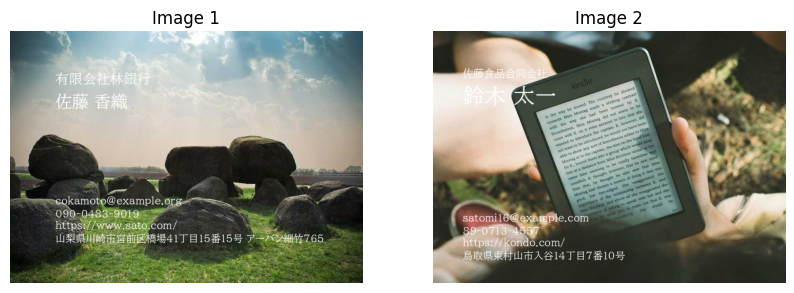

text: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Image 1: <|vision_start|><|image_pad|><|vision_end|>Image 2: <|vision_start|><|image_pad|><|vision_end|>Read all the text in the image.<|im_end|>
<|im_start|>assistant



In [6]:
image_path1 = "/workspace/input/generate_image/test/image/2.png"
image_path2 = "/workspace/input/generate_image/test/image/5.png"
first_prompt = "Image 1: "
second_prompt = "Image 2: "
prompt = "Read all the text in the image."

image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# image1, image2„ÇíË°®Á§∫
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Image 1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title("Image 2")
plt.axis('off')
plt.show()

## Use a local HuggingFace model to inference.
response = inference(image_path1, image_path2, first_prompt=first_prompt, second_prompt=second_prompt, prompt=prompt)

In [7]:
print(response)

ÊúâÈôê‰ºöÁ§æÊûóÈäÄË°å
‰ΩêËó§ È¶ôÁπî
cokamoto@example.org
090-0483-9019
https://www.sato.com/
Â±±Ê¢®ÁúåÂ∑ùÂ¥éÂ∏ÇÂÆÆÂâçÂå∫Ê©ãÂ†¥41‰∏ÅÁõÆ15Áï™15Âè∑ „Ç¢„Éº„Éê„É≥Á¥∞Á´π765

‰ΩêËó§È£üÂìÅÂêàÂêå‰ºöÁ§æ
Èà¥Êú® Â§™‰∏Ä
satomi16@example.com
89-0713-4557
https://kondo.com/
È≥•ÂèñÁúåÊù±ÊùëÂ±±Â∏ÇÂÖ•Ë∞∑14‰∏ÅÁõÆ7Áï™10Âè∑
